In [1]:
#get some library
import pandas as pd
import seaborn as sns
from Bio import SeqIO
import numpy as np
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools

from ipywidgets import widgets
from IPython.display import display
from plotly.widgets import GraphWidget

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
init_notebook_mode(connected=True)

<IPython.core.display.Javascript object>

# SILAC Experiments

In [2]:
#get only the gene id from
#the new TryTripDB format
def clean_id(temp_id):
    temp_id = temp_id.split(':')[0]
    if temp_id.count('.')>2:
        temp_id = '.'.join(temp_id.split('.')[0:3])
    return temp_id

#helper function to print out
#the protein removed at each threshold
def print_result(start_df_shape, shape_before, df, what):
    removed = shape_before[0]- df.shape[0]
    removed_from_beginning = start_df_shape[0]-df.shape[0]
    if removed > 0:
        print ('removed ',removed, what )  
        print ('tot ', removed_from_beginning, ' entries removed' )
        print ('---------------')
    else:
        print (what)
        print ('nothing removed')
        print ('---------------')

#remove rubbish entires from a
#maxquant output
def clean(df):  
    #remove Only identified by site
    before,start = df.shape,df.shape
    col = 'Only identified by site'
    df = df[df[col] != '+'] 
    print_result(start, before, df, col)
    
    #remove hits from reverse database
    before = df.shape
    col = 'Reverse'
    df = df[df[col] != '+']
    print_result(start, before, df, col)
        
    #remove contaminants (mainly keratine and bsa)
    before = df.shape
    col = 'Potential contaminant'
    df = df[df[col] != '+']
    print_result(start, before, df, col)
    
    ##remove protein groups with less thatn 2 unique peptides
    #before = df.shape
    #col = 'Peptide counts (unique)'
    #df['unique'] = [int(n.split(';')[0]) for n in df[col]]
    #df = df[df['unique'] >= 2]
    #print_result(start, before, df, col)
    return df

In [4]:
#add back the description of the proteins
desc_dict = {}
path = '../TriTrypDB-32_TbruceiTREU927_AnnotatedProteins.fasta'
with open(path, "r") as handle:
    a=0
    for record in SeqIO.parse(handle, "fasta"):
        a+=1
        temp_id = clean_id(record.id).strip()
        temp_desc = record.description.split('|')[4].strip()
        #print  (record.description.split('|'))
        desc_dict[temp_id]=temp_desc


In [11]:
#df_lf2 = pd.read_csv('20180820 TbdeAc2 labeel free data-1/proteinGroups.txt',sep='\t')
#df_lf2['gene_desc']=[desc_dict[clean_id(n)] if clean_id(n) in desc_dict else 'none' for n in df_lf2['Protein IDs']]
#df_lf2.tail()
#df_lf2.to_csv('20180820 TbdeAc2 labeel free data-1/proteinGroups_desc.txt',sep='\t', index=False)

In [110]:
#read data and log transform for plots
df = pd.read_csv('proteinGroups.txt',sep='\t')
df = clean(df)
df['Gene_id'] = [clean_id(n.split(';')[0]) for n in df['Protein IDs']]
df['Gene_desc'] = [desc_dict[n].split('=')[1].strip() for n in df['Gene_id']]
df['Gene_id_all'] = [    ';'.join([ clean_id(a) for a in n.split(';')]) for n in df['Protein IDs' ]  ]  
df['Gene_desc_all'] = [    '; '.join([ desc_dict[a].split('=')[1].strip() if a in desc_dict else 'none' for a in n.split(';')]) for n in df['Gene_id_all' ]  ]  
df['Intensity DEAC2'] = df['Intensity DEAC2']+(df['Intensity DEAC2'][df['Intensity DEAC2']>0].min())
df['Intensity SM'] = df['Intensity SM']+(df['Intensity SM'][df['Intensity SM']>0].min())
df['signal_perc']    =  df['Intensity DEAC2'] / (df['Intensity DEAC2']+df['Intensity SM'])*100
df['signal_logfc'] =  np.log2(df['Intensity DEAC2'] / df['Intensity SM'])
df.set_index('Gene_id',inplace=True)
df[['signal_perc','signal_logfc', 'Gene_desc']].sort_values('signal_perc').dropna().tail(50)

removed  23 Only identified by site
tot  23  entries removed
---------------
removed  21 Reverse
tot  44  entries removed
---------------
removed  42 Potential contaminant
tot  86  entries removed
---------------


,signal_perc,signal_logfc,Gene_desc
Gene_id,,,
Tb927.10.15320,97.161860,5.097372,"hypothetical protein, conserved"
Tb927.6.2700,97.214558,5.125194,small nuclear ribonucleoprotein Sm-E
Tb09.v4.0067,97.307125,5.175326,"retrotransposon hot spot protein, pseudogene"
Tb927.11.3300,97.344911,5.196274,Spindle assembly abnormal 4
Tb927.11.190,97.428758,5.243810,"elongation factor, putative"
Tb927.11.2530,97.434882,5.247342,"Mitochondrial SSU ribosomal protein, putative"
Tb927.10.1040,97.462735,5.263505,"serine peptidase, Clan SC, Family S10"
Tb927.9.5210,97.509229,5.290875,"glutaminyl-tRNA synthetase, putative"
Tb927.7.270,97.526228,5.301006,"ribosome biogenesis protein, putative"


Text(99.87259242997618, 8.777219470896853, 'Bait')

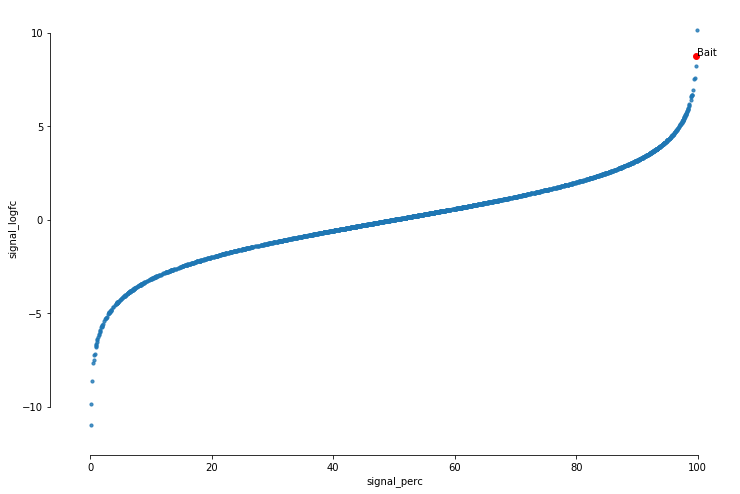

In [108]:
fig,ax = plt.subplots(figsize=(12,8))
sns.regplot(x='signal_perc', y='signal_logfc', 
            fit_reg=False, data = df,##[df['exp_lf']>0.8],
            ax=ax, scatter_kws={'s':10})
sns.despine(offset=10, trim=True)
x_val = df.loc['Tb927.3.2610']['signal_perc']
y_val = df.loc['Tb927.3.2610']['signal_logfc']
ax.scatter(x_val,y_val, s=35, c='r')
ax.annotate('Bait', xy=(x_val, y_val), xytext=(x_val+0.1, y_val),
            )


In [109]:
temp = df[df['signal_perc']>0]
#interactive plot
trace_1 = go.Scatter(
    x=temp.signal_perc,
    y=temp.signal_logfc,
    mode='markers',
    name='MA Plot',
    text = [a + ' ' +b for a,b in zip(temp.index.values, temp.Gene_desc)],
    hoverinfo = 'text',
    marker=dict(
        #size=16,
        color = np.log10(temp.Score), #set color equal to a variable
        colorscale='Bluered',
        showscale=True
    )
)

annot_1 = go.Scatter(
    x=[temp.signal_perc.loc['Tb927.3.2610']],
    y=[temp.signal_logfc.loc['Tb927.3.2610']],
    mode='markers+text',
    name='Tb927.3.2610',
    text=['Bait'],
    textposition='bottom center'
)


layout = dict(title='MA DEAC2 MS/MS count',
             width=1000,
             height=1200)


fig = go.Figure(data=[trace_1, annot_1], 
                layout=layout)
iplot(fig, filename='test')